# Explore Exercise

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
import acquire as a
import prepare as p
import warnings
warnings.filterwarnings('ignore')

from env import host, user, password
from sklearn.model_selection import TimeSeriesSplit
from datetime import timedelta, datetime
from sklearn.model_selection import train_test_split




Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.




#  ACQUIRE

In [2]:
# Call the function to get the DataFrame.
store_df = a.get_store_data()


In [3]:
store_df['sales_total'] = store_df['sale_amount'] * store_df['item_price']
store_df.head().T

store_id,1,1,1,1,1
item_id,1,1,1,1,1
sale_id,1,2,3,4,5
sale_date,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05
sale_amount,13,11,14,13,10
item_upc14,35200264013,35200264013,35200264013,35200264013,35200264013
item_upc12,35200264013,35200264013,35200264013,35200264013,35200264013
item_brand,Riceland,Riceland,Riceland,Riceland,Riceland
item_name,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice,Riceland American Jazmine Rice
item_price,0.84,0.84,0.84,0.84,0.84
store_address,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy,12125 Alamo Ranch Pkwy


In [4]:
store_df.reset_index().sales_total.value_counts()

44.37     132
39.15     123
36.54     121
49.59     120
41.76     119
         ... 
170.10      1
160.38      1
150.66      1
167.67      1
117.81      1
Name: sales_total, Length: 329, dtype: int64

In [5]:
# Assuming df is your DataFrame with the sale_date column
# First, ensure that the sale_date column is in datetime format
store_df = p.convert_to_datetime(store_df)

# Now, you can call the date range using pd.date_range()
date_range = pd.date_range(start=store_df['sale_date'].min(), end=store_df['sale_date'].max(), freq='D')

# The date_range variable now contains the range of dates from the minimum to the maximum sale_date in your DataFrame
print(date_range)


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')


In [6]:
# Check the data types and non-null counts
store_df.info()

# Summary statistics of the numerical columns
store_df.describe()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 1
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   item_id        10000 non-null  int64         
 1   sale_id        10000 non-null  int64         
 2   sale_date      10000 non-null  datetime64[ns]
 3   sale_amount    10000 non-null  int64         
 4   item_upc14     10000 non-null  int64         
 5   item_upc12     10000 non-null  int64         
 6   item_brand     10000 non-null  object        
 7   item_name      10000 non-null  object        
 8   item_price     10000 non-null  float64       
 9   store_address  10000 non-null  object        
 10  store_zipcode  10000 non-null  int64         
 11  store_city     10000 non-null  object        
 12  store_state    10000 non-null  object        
 13  sales_total    10000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.1+ M

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_price,store_zipcode,sales_total
count,10000.000000,10000.000000,10000.00000,1.000000e+04,1.000000e+04,10000.000000,10000.0,10000.000000
mean,3.261000,42157.774000,30.21510,1.960001e+11,1.960001e+11,3.425906,78253.0,128.223601
std,1.594093,29041.368251,17.09331,2.750173e+11,2.750173e+11,2.065471,0.0,138.872235
min,1.000000,1.000000,3.00000,1.111107e+10,1.111107e+10,0.840000,78253.0,3.360000
25%,2.000000,18934.750000,17.00000,2.392333e+10,2.392333e+10,2.430000,78253.0,33.930000
50%,3.000000,37868.500000,25.00000,3.520026e+10,3.520026e+10,2.610000,78253.0,63.180000
75%,5.000000,73236.250000,40.00000,2.085288e+11,2.085288e+11,6.440000,78253.0,206.080000
max,6.000000,92170.000000,115.00000,7.592831e+11,7.592831e+11,6.930000,78253.0,740.600000


In [7]:
store_df['sale_date'] = pd.to_datetime(store_df['sale_date'])

# Set the 'date' column as the index
store_df.set_index('sale_date', inplace=True)

# Now the index of the DataFrame will be in datetime format
print(store_df.index.dtype)

datetime64[ns]


In [8]:
store_df.head(2)

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,sales_total
sale_date,,,,,,,,,,,,,
2013-01-01,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92
2013-01-02,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,9.24


In [9]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10000 entries, 2013-01-01 to 2015-05-20
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_id        10000 non-null  int64  
 1   sale_id        10000 non-null  int64  
 2   sale_amount    10000 non-null  int64  
 3   item_upc14     10000 non-null  int64  
 4   item_upc12     10000 non-null  int64  
 5   item_brand     10000 non-null  object 
 6   item_name      10000 non-null  object 
 7   item_price     10000 non-null  float64
 8   store_address  10000 non-null  object 
 9   store_zipcode  10000 non-null  int64  
 10  store_city     10000 non-null  object 
 11  store_state    10000 non-null  object 
 12  sales_total    10000 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [10]:
store_df.index = pd.to_datetime(store_df.index)

In [11]:
store_df.index.dtype

dtype('<M8[ns]')

In [12]:
store_df.shape

(10000, 13)

In [13]:
# Check for missing values
print(store_df.isnull().sum())

# If there are any missing values, handle them as needed, for example:
# df = df.dropna()  # Drop rows with missing values
# df = df.fillna(0)  # Fill missing values with 0
# df = df.interpolate()  # Interpolate missing values

# Check for duplicates
print(store_df.duplicated().sum())

# If there are any duplicates, remove them if necessary
# df = df.drop_duplicates()


item_id          0
sale_id          0
sale_amount      0
item_upc14       0
item_upc12       0
item_brand       0
item_name        0
item_price       0
store_address    0
store_zipcode    0
store_city       0
store_state      0
sales_total      0
dtype: int64
0


# DATA SPLITTING 

- Ideally all splits contain a season
- Human-based: use the last year as test
- Percentage based: use the last 20% as test
- Cross Validate: break data up into slices and use successive slices as train and test repeatedly (sklearn.model_selection.TimeSeriesSplit) image.png


In [14]:
train_size = 0.70 
n = store_df.shape[0] 
test_start_index = round(train_size * n)
test_start_index

7000

In [15]:
train =  store_df.iloc[:test_start_index] 
test =  store_df.iloc[test_start_index:] 

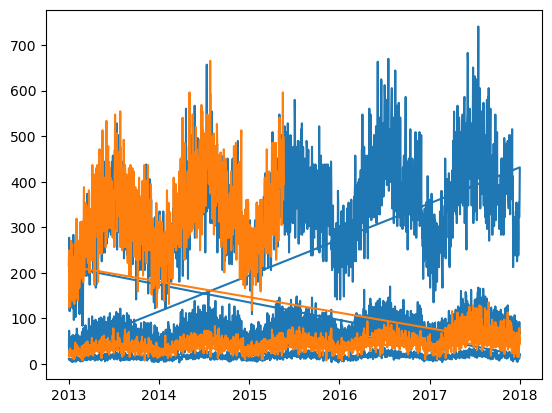

In [16]:
train = store_df[:test_start_index] # everything up (not including) to the test_start_index
test =store_df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

# HUMAN-BASED

In [17]:
train = store_df.loc[:'2013'].copy()
test = store_df.loc['2017':].copy()

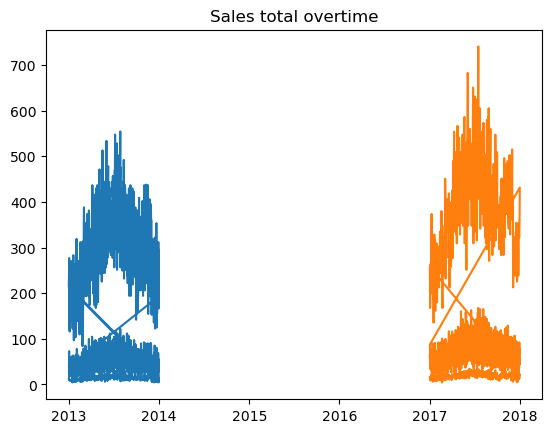

In [18]:
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)
plt.title('Sales total overtime')
plt.show()

# VISUALIZATIONS

In [19]:
y = train.sales_total
y.head()

sale_date
2013-01-01    10.92
2013-01-02     9.24
2013-01-03    11.76
2013-01-04    10.92
2013-01-05     8.40
Name: sales_total, dtype: float64

1. Blow off the time series

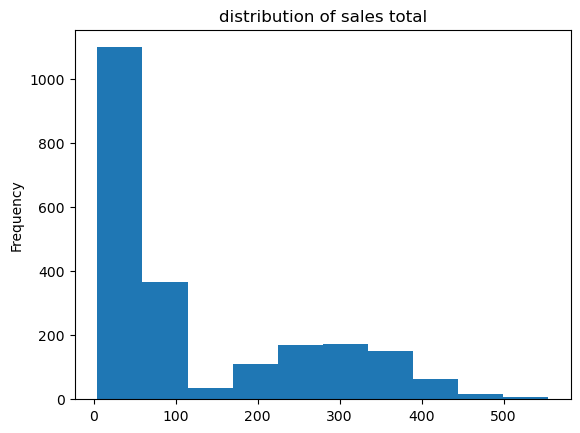

In [20]:
train.sales_total.plot.hist()
plt.title('distribution of sales total')
plt.show()


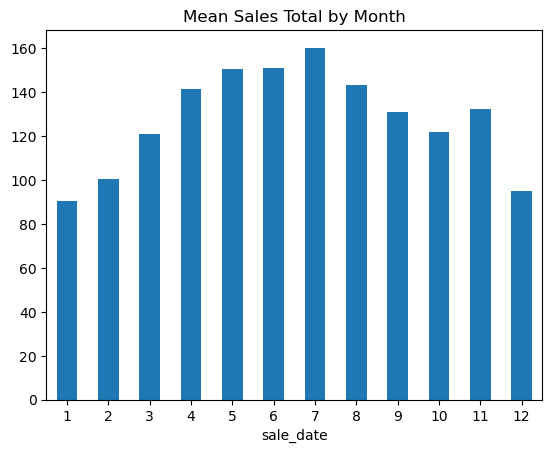

In [21]:
# Convert the index to a DateTime index (if it's not already)
store_df.index = pd.to_datetime(store_df.index)

# Assuming 'store_df' is the DataFrame with 'sales_total' column
store_df.groupby(store_df.index.month)['sales_total'].mean().plot.bar()
plt.tick_params('x', rotation=0)
plt.title('Mean Sales Total by Month')
plt.show()


In [22]:
# assign a weekday column from the day_name() method on the datetime index
train['weekday'] = train.index.day_name()
train['day_num'] = train.index.day_of_week

In [23]:
train

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,sales_total,weekday,day_num
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,Tuesday,1
2013-01-02,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,9.24,Wednesday,2
2013-01-03,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,11.76,Thursday,3
2013-01-04,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,Friday,4
2013-01-05,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,8.40,Saturday,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-12-27,6,91661,36,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,249.48,Friday,4
2013-12-28,6,91662,31,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,214.83,Saturday,5
2013-12-29,6,91663,45,74170388732,74170388732,Sally Hansen,Sally Hansen Nail Color Magnetic 903 Silver El...,6.93,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,311.85,Sunday,6


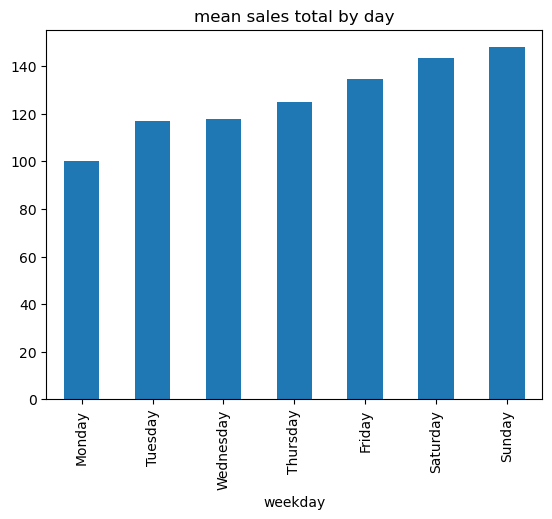

In [24]:
# aggregate on that weekday
train.groupby('weekday').mean().sort_values('day_num').sales_total.plot.bar()

plt.title('mean sales total by day')
plt.show()

2. target over time

In [25]:
train.columns

Index(['item_id', 'sale_id', 'sale_amount', 'item_upc14', 'item_upc12',
       'item_brand', 'item_name', 'item_price', 'store_address',
       'store_zipcode', 'store_city', 'store_state', 'sales_total', 'weekday',
       'day_num'],
      dtype='object')

In [26]:
y.head()

sale_date
2013-01-01    10.92
2013-01-02     9.24
2013-01-03    11.76
2013-01-04    10.92
2013-01-05     8.40
Name: sales_total, dtype: float64

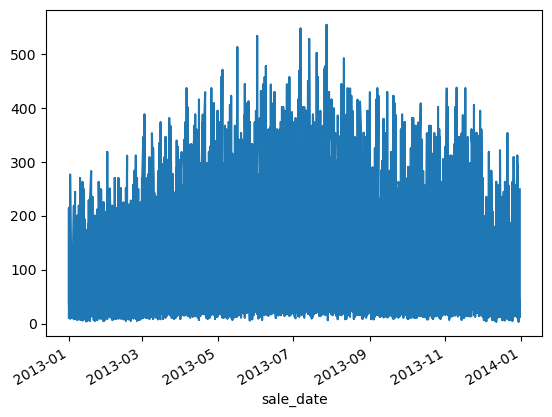

In [27]:
y.plot();

3. target averaged over various periods over time

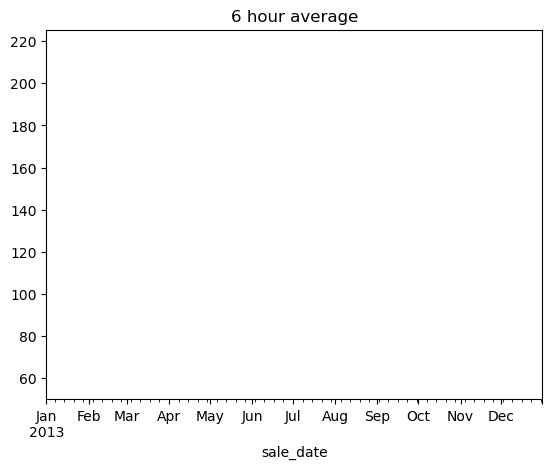

In [28]:
y.resample('6H').mean().plot(title='6 hour average');

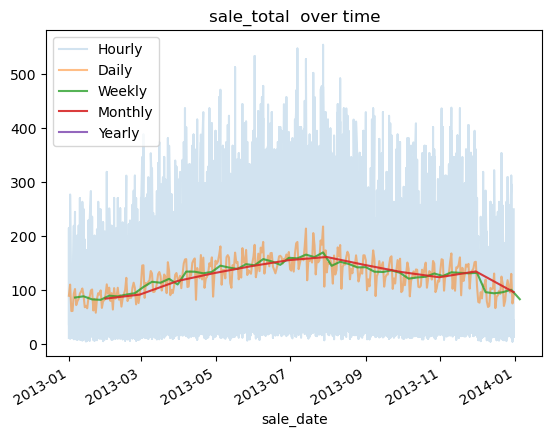

In [29]:
y.plot(alpha=0.2, label='Hourly')

y.resample('D').mean().plot(alpha=0.5, label='Daily')
y.resample('W').mean().plot(alpha=0.8, label='Weekly')
y.resample('M').mean().plot(alpha=0.9, label='Monthly')
y.resample('Y').mean().plot(label='Yearly')

plt.title('sale_total  over time')
plt.legend()
plt.show()


4. change in target over time
.diff will allow us to get deltas between values

**look at the difference in data by week**

- resample the data by week, get the average for that week
- make the difference utilizing .diff()
- plot the changes over time in order to examine volatility

In [30]:
y.resample('W').mean().diff()

sale_date
2013-01-06          NaN
2013-01-13     2.268016
2013-01-20    -5.734524
2013-01-27    -0.774048
2013-02-03     7.665952
2013-02-10    -1.343095
2013-02-17     3.374762
2013-02-24     2.622857
2013-03-03    11.490714
2013-03-10     9.598095
2013-03-17    -1.737143
2013-03-24     7.226190
2013-03-31   -10.474286
2013-04-07    23.935952
2013-04-14    -0.283095
2013-04-21    -2.929524
2013-04-28     2.587143
2013-05-05    11.624286
2013-05-12    -3.558333
2013-05-19    -2.521190
2013-05-26     8.811905
2013-06-02    -2.065238
2013-06-09    11.428810
2013-06-16    -4.193810
2013-06-23    -6.421905
2013-06-30    13.006429
2013-07-07    -0.927857
2013-07-14     6.878333
2013-07-21    -4.633810
2013-07-28     8.729048
2013-08-04   -24.819524
2013-08-11     7.522381
2013-08-18    -4.064048
2013-08-25    -6.375000
2013-09-01     0.356905
2013-09-08    -8.353333
2013-09-15    -0.579762
2013-09-22     3.035476
2013-09-29    -4.533333
2013-10-06   -10.805952
2013-10-13     2.204524
2013-1

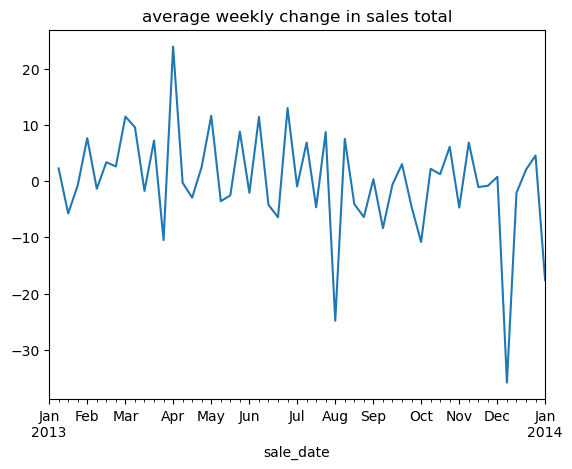

In [31]:
y.resample('W').mean().diff().plot(title='average weekly change in sales total');

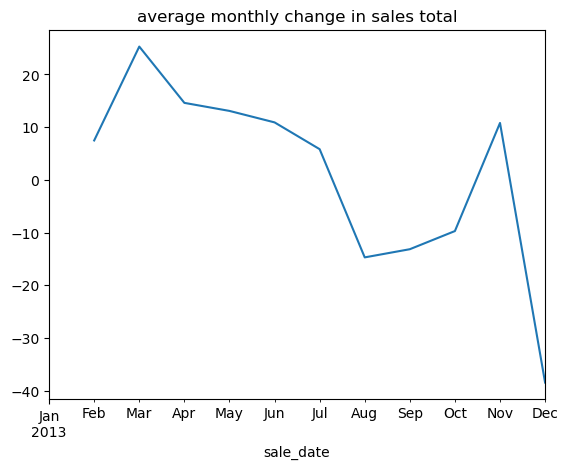

In [32]:
y.resample('M').mean().diff().plot(title='average monthly change in sales total');

5. Seasonal Plot
shows the comparison of multiple seasons together

our example: one season is one year. multiple lines are shown to show multiple years.

- xaxis: month
- yaxis: y
- color: year

In [33]:
y.groupby([y.index.year, y.index.month]).mean()[:6]

sale_date  sale_date
2013       1             83.788548
           2             91.271548
           3            116.565376
           4            131.180000
           5            144.268118
           6            155.180611
Name: sales_total, dtype: float64

.unstack
- unstack will make a pivot table of a second order index

In [34]:
y.groupby([y.index.year, y.index.month]).mean().unstack()

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,83.788548,91.271548,116.565376,131.18,144.268118,155.180611,161.009086,146.307796,133.157556,123.450699,134.253889,95.79871


In [35]:
# In this case, we turn the 0 index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

sale_date,2013
sale_date,
1,83.788548
2,91.271548
3,116.565376
4,131.180000
5,144.268118
6,155.180611
7,161.009086
8,146.307796
9,133.157556


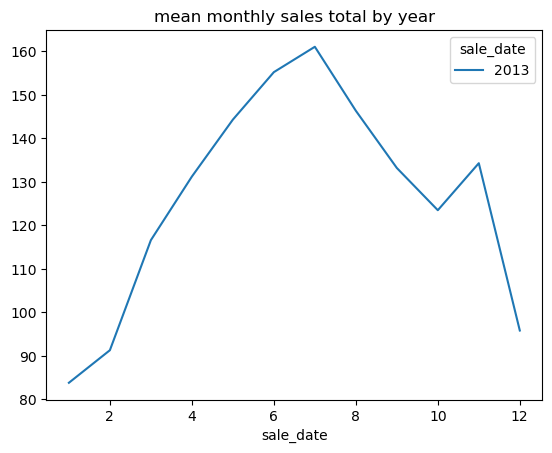

In [36]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot()
plt.title('mean monthly sales total by year')
plt.show()


6. Seasonal Subseries Plot

In [37]:
# make my pivot table of years to month with unstack()
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
table

sale_date,1,2,3,4,5,6,7,8,9,10,11,12
sale_date,,,,,,,,,,,,
2013,83.788548,91.271548,116.565376,131.18,144.268118,155.180611,161.009086,146.307796,133.157556,123.450699,134.253889,95.79871


In [39]:
list1=[1,2,3]
list2=[4,5,6]
for item1, item2 in zip(list1, list2):
    print(item1, item2)


1 4
2 5
3 6


In [40]:
for i in table.iteritems():
    print(i)

(1, sale_date
2013    83.788548
Name: 1, dtype: float64)
(2, sale_date
2013    91.271548
Name: 2, dtype: float64)
(3, sale_date
2013    116.565376
Name: 3, dtype: float64)
(4, sale_date
2013    131.18
Name: 4, dtype: float64)
(5, sale_date
2013    144.268118
Name: 5, dtype: float64)
(6, sale_date
2013    155.180611
Name: 6, dtype: float64)
(7, sale_date
2013    161.009086
Name: 7, dtype: float64)
(8, sale_date
2013    146.307796
Name: 8, dtype: float64)
(9, sale_date
2013    133.157556
Name: 9, dtype: float64)
(10, sale_date
2013    123.450699
Name: 10, dtype: float64)
(11, sale_date
2013    134.253889
Name: 11, dtype: float64)
(12, sale_date
2013    95.79871
Name: 12, dtype: float64)


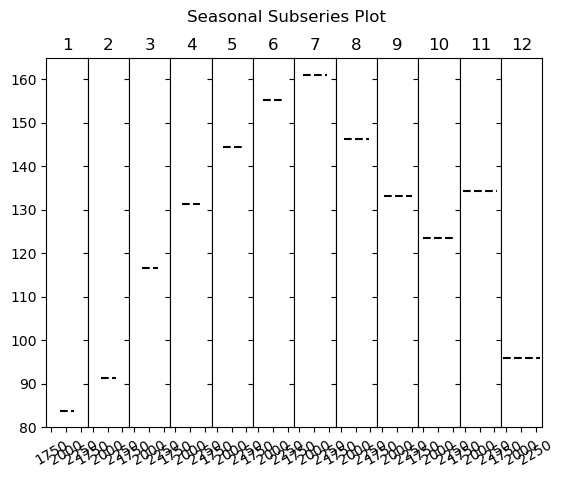

In [42]:
# unpacking my figure and axes elements
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)

# for ax, (month, subset) 
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim(), color='black', ls='--')
    ax.set(xlabel='')
    ax.tick_params('x', rotation=30)
    
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
# fig.tight_layout()
fig.subplots_adjust(wspace=0)

As with the monthly box plot, the seasonal pattern is quite evident in the seasonal subseries.

- Do the data exhibit a seasonal pattern?
- What is the nature of the seasonality?
- Is there a within-group pattern (e.g., do January and July exhibit similar patterns)?
- Are there any outliers once seasonality has been accounted for?

7. Lag Plot

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

If your data is sampled daily, you could think of t as 'today', t+1 is 'tomorrow'. More generally, t is any given time period and t+1 is the time period after. If your data is sampled weekly, t is any given week, and t+1 is the following week.

In [43]:
train['y(t + 1)'] = train.sales_total.shift(-1)
train.head()


,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_brand,item_name,item_price,store_address,store_zipcode,store_city,store_state,sales_total,weekday,day_num,y(t + 1)
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,1,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,Tuesday,1,9.24
2013-01-02,1,2,11,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,9.24,Wednesday,2,11.76
2013-01-03,1,3,14,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,11.76,Thursday,3,10.92
2013-01-04,1,4,13,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,10.92,Friday,4,8.40
2013-01-05,1,5,10,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,8.40,Saturday,5,10.08


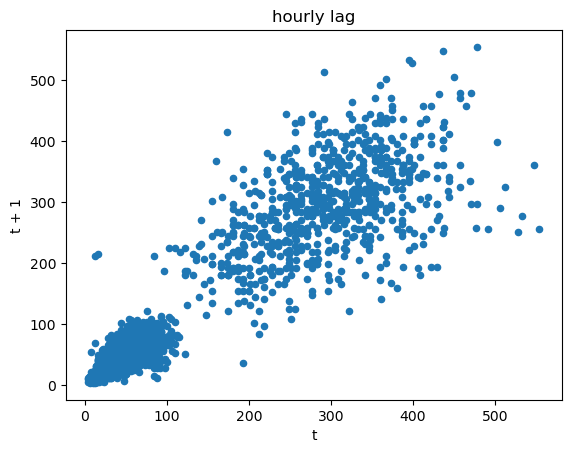

In [44]:
train.plot.scatter(x='sales_total', y='y(t + 1)').set(xlabel='t', ylabel='t + 1')
plt.title('hourly lag')
plt.show()

looks like we have a pretty strong linear association between the hour now and the temperature for the next hour


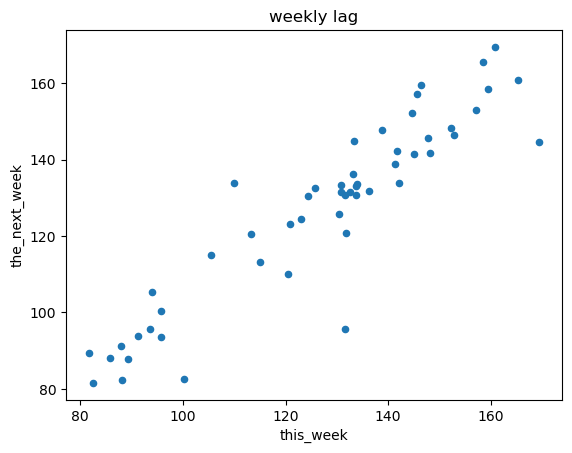

In [45]:
weekly = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['the_next_week'] = weekly.sales_total.shift(-1)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='the_next_week')
plt.title('weekly lag')
plt.show()

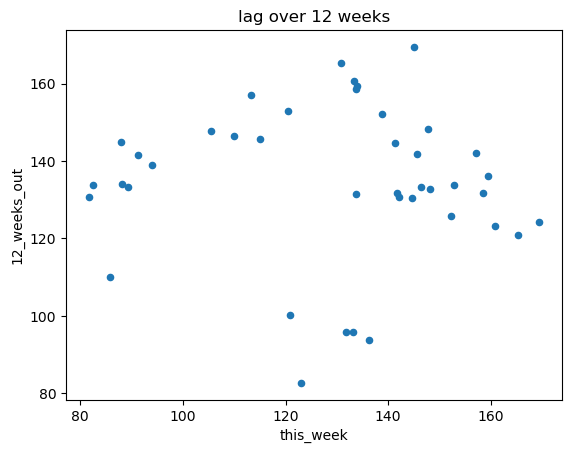

In [46]:
weekly  = train.resample('W').mean().drop(columns='y(t + 1)')
weekly['12_weeks_out'] = weekly.sales_total.shift(-12)
weekly = weekly.rename(columns={'sales_total': 'this_week'})
weekly.plot.scatter(x='this_week', y='12_weeks_out')
plt.title('lag over 12 weeks')
plt.show()

use pd.plotting.lag_plot

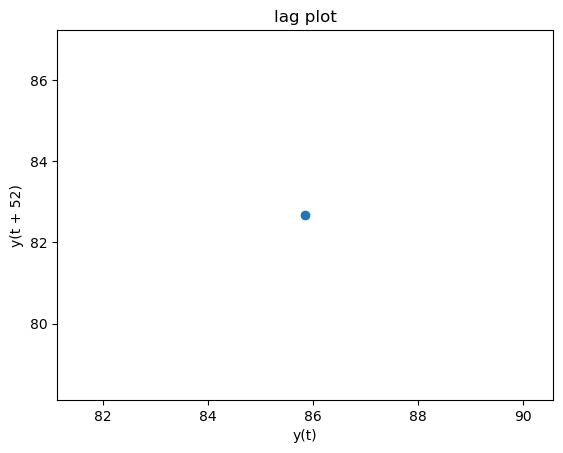

In [47]:
#same thing, but easier
pd.plotting.lag_plot(train.sales_total.resample('W').mean(), lag=52)
plt.title('lag plot');

8. Autocorrelation Plot
Autocorrelation is a measure of the linear relationship between lagged values of a time series. An autocorrelation plot shows the correlation coefficient as a function of lag time.


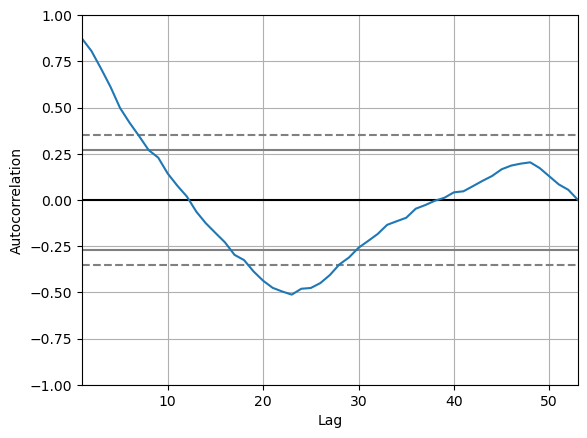

In [48]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())
plt.show()

This can help us identify seasonality by looking at the peaks and valleys of the resulting visualization. The peaks can tells us the frequency with which the seasonality repeats itself, and the valleys show us where the correlation is the most negative.

The dashed lines are a way measure whether the observed autocorrelation is a meaningful signal or just white noise. If the majority of the peaks and valleys fall within the dashed lines, the time series is probably white noise.

9. Seasonal Decomposition
Seasonal decomposition is a fancy way to say that we can model time series as having 3 seperate components, the seasonal repeated cycle, the long term trend, and random noise1. There are two types of seasonal decomposition models, additive and multiplicative.

data = Seasonality + Trend + Residual

In [49]:
import statsmodels.api as sm


In [50]:
y = train.sales_total.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)


ValueError: x must have 2 complete cycles requires 104 observations. x only has 53 observation(s)

In [53]:
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid
})

NameError: name 'result' is not defined

In [54]:
decomposition['trend_centered'] = decomposition.trend - decomposition.trend.mean()
decomposition[['trend_centered', 'seasonal', 'resid']].plot();


NameError: name 'decomposition' is not defined

10 Area Plots

- can we visualize categories over time?

In [55]:
train.columns

Index(['item_id', 'sale_id', 'sale_amount', 'item_upc14', 'item_upc12',
       'item_brand', 'item_name', 'item_price', 'store_address',
       'store_zipcode', 'store_city', 'store_state', 'sales_total', 'weekday',
       'day_num', 'y(t + 1)'],
      dtype='object')

In [56]:
train = train.drop(columns=['y(t + 1)','weekday','day_num'])
train = train.resample('D').mean()
train


,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_price,store_zipcode,sales_total
sale_date,,,,,,,,
2013-01-01,3.5,45651.0,18.833333,1.853695e+11,1.853695e+11,3.731667,78253.0,89.138333
2013-01-02,3.5,45652.0,22.833333,1.853695e+11,1.853695e+11,3.731667,78253.0,109.790000
2013-01-03,3.5,45653.0,14.166667,1.853695e+11,1.853695e+11,3.731667,78253.0,60.773333
2013-01-04,3.5,45654.0,14.666667,1.853695e+11,1.853695e+11,3.731667,78253.0,60.993333
2013-01-05,3.5,45655.0,19.666667,1.853695e+11,1.853695e+11,3.731667,78253.0,92.773333
...,...,...,...,...,...,...,...,...
2013-12-27,3.5,46011.0,22.500000,1.853695e+11,1.853695e+11,3.731667,78253.0,105.270000
2013-12-28,3.5,46012.0,21.500000,1.853695e+11,1.853695e+11,3.731667,78253.0,95.280000
2013-12-29,3.5,46013.0,27.166667,1.853695e+11,1.853695e+11,3.731667,78253.0,129.703333


In [60]:
train['sales_total_bin'] = pd.qcut(train.sales_total, 4)


In [61]:
train.head()


,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_price,store_zipcode,sales_total,sales_total_bin
sale_date,,,,,,,,,
2013-01-01,3.5,45651.0,18.833333,1.853695e+11,1.853695e+11,3.731667,78253.0,89.138333,"(57.687000000000005, 102.615]"
2013-01-02,3.5,45652.0,22.833333,1.853695e+11,1.853695e+11,3.731667,78253.0,109.790000,"(102.615, 129.067]"
2013-01-03,3.5,45653.0,14.166667,1.853695e+11,1.853695e+11,3.731667,78253.0,60.773333,"(57.687000000000005, 102.615]"
2013-01-04,3.5,45654.0,14.666667,1.853695e+11,1.853695e+11,3.731667,78253.0,60.993333,"(57.687000000000005, 102.615]"
2013-01-05,3.5,45655.0,19.666667,1.853695e+11,1.853695e+11,3.731667,78253.0,92.773333,"(57.687000000000005, 102.615]"


In [62]:
train.groupby('sales_total_bin').resample('M').size()


sales_total_bin                sale_date 
(57.687000000000005, 102.615]  2013-01-31    30
                               2013-02-28    20
                               2013-03-31     9
                               2013-04-30     2
                               2013-05-31     0
                               2013-06-30     0
                               2013-07-31     0
                               2013-08-31     1
                               2013-09-30     4
                               2013-10-31     3
                               2013-11-30     5
                               2013-12-31    18
(102.615, 129.067]             2013-01-31     1
                               2013-02-28     8
                               2013-03-31    13
                               2013-04-30    14
                               2013-05-31     7
                               2013-06-30     1
                               2013-07-31     3
                               2013-08-31     

In [63]:
train.groupby('sales_total_bin').mean()

,item_id,sale_id,sale_amount,item_upc14,item_upc12,item_price,store_zipcode,sales_total
sales_total_bin,,,,,,,,
"(57.687000000000005, 102.615]",3.5,45783.989130,18.798913,1.853695e+11,1.853695e+11,3.731667,78253.0,86.555344
"(102.615, 129.067]",3.5,45841.307692,24.747253,1.853695e+11,1.853695e+11,3.731667,78253.0,115.876337
"(129.067, 149.982]",3.5,45860.439560,29.853480,1.853695e+11,1.853695e+11,3.731667,78253.0,139.331685
"(149.982, 217.537]",3.5,45846.802198,35.166667,1.853695e+11,1.853695e+11,3.731667,78253.0,164.709689


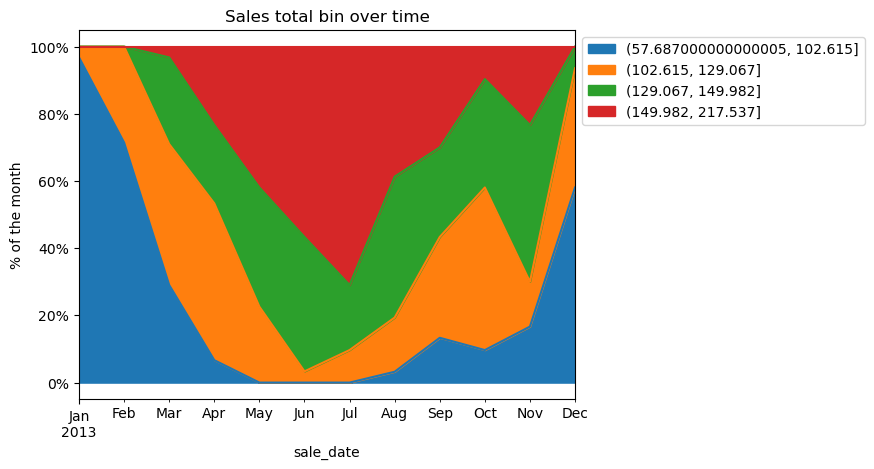

In [64]:
ax = (train.groupby('sales_total_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area(title='Sales total bin over time', ylabel='% of the month'))
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
ax.yaxis.set_major_formatter('{:.0%}'.format)


# TAKEAWAY 
-
-

## OPEN POWER SYSTEMS DATA FOR GERMANY


In [65]:
#Call the function to get the DataFrame.
power_data_df =a.get_power_data()


<Axes: >

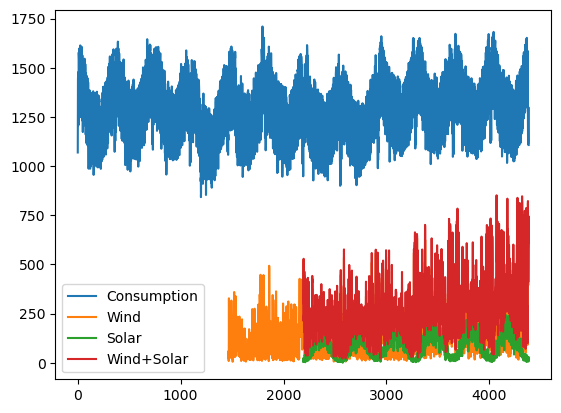

In [67]:
power_data_df.plot()

In [68]:
train = power_data_df.loc[:'2014']
test = power_data_df.loc['2015':]

TypeError: unhashable type: 'numpy.ndarray'

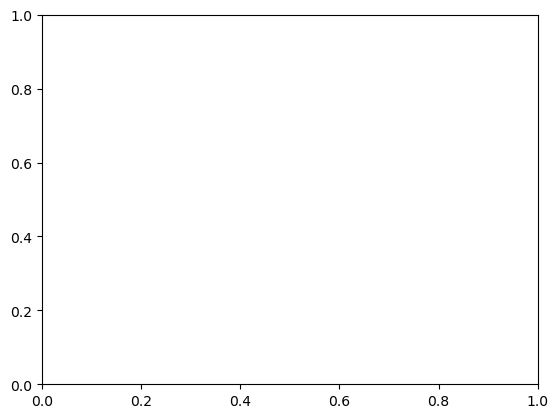

In [70]:
plt.plot(train.index, train)
plt.plot(test.index, test)
plt.show()


In [71]:
train.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN
